# Support Vector Classifier Strategy

In this notebook, you will learn to use the support vector classifier (SVC) algorithm and its step by step implementation on Apple stock. 

SVCs are supervised learning models. A set of training data is provided to the SVC algorithm, each belonging to one of the  categories. For instance, the categories can be either to buy or to sell a stock. The algorithm builds a model during training phase and assigns new data into one of the categories based on the model crated during the training phase.

# Importing the libraries

In [1]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
import seaborn

# To fetch data
from pandas_datareader import data as pdr   
import yfinance as yf  
yf.pdr_override()

import warnings
warnings.filterwarnings('ignore')


# Downloading Apple stock data

We will download Apple stock ("AAPL") data from yahoo finance.

[*********************100%***********************]  1 of 1 completed


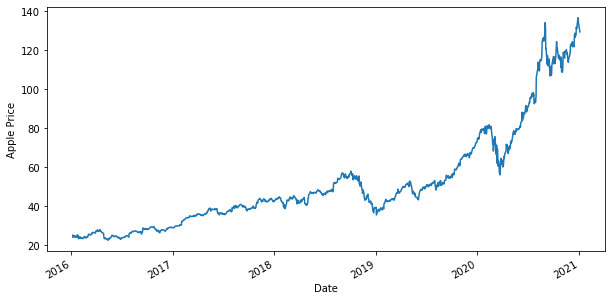

In [2]:
Df = pdr.get_data_yahoo('AAPL', start="2016-01-06", end="2021-01-05")         
Df= Df.dropna()
Df.Close.plot(figsize=(10,5))
plt.ylabel("Apple Price")
plt.show()

# Determine the correct trading signal

If tomorrow's price is greater than today's price then we will buy Apple stock, else we will sell the stock. We will store +1 for buy signal and -1 for sell signal in the Signal column. 'y' is a target dataset storing the correct trading signal which the machine learning algorithm will try to predict.

In [3]:
y = np.where(Df['Close'].shift(-1) > Df['Close'],1,-1)

# Creation of predictors datasets

The X is a dataset that holds the variables which are used to predict y, that is, whether Apple stock price will go up (1) or go down (-1) tomorrow. The X consists of variables such as 'Open - Close', 'High - Low' and 'Volume'. These can be understood as indicators based on which the algorithm will predict tomorrow's trend.

In [4]:
Df['Open-Close'] = Df.Open - Df.Close
Df['High-Low'] = Df.High - Df.Low
Df['Volume'] = Df.Volume
X=Df[['Open-Close','High-Low', 'Volume']]
X.head()

,Open-Close,High-Low,Volume
Date,,,
2016-01-06,-0.035000,0.625000,273829600
2016-01-07,0.557501,0.924999,324377600
2016-01-08,0.397501,0.587500,283192000
2016-01-11,0.110001,0.430000,198957600
2016-01-12,0.147501,0.462502,196616800


# Test and train data set split

Now, we will split data into training and test data set. 

1. First 75% of data is used for training and remaining data for testing.
2. X_train and y_train are training dataset.
3. X_test and y_test are test dataset.

In [5]:
split_percentage = 0.75
split = int(split_percentage*len(Df))

# Train data set
X_train = X[:split]
y_train = y[:split] 

# Test data set
X_test = X[split:]
y_test = y[split:]

# Support Vector Classifier (SVC)

We will use SVC() function from sklearn.svm.SVC library for the classification and create our classifier model using fit() method on the training data set.

In [6]:
cls = SVC().fit(X_train, y_train)

# Classifier accuracy
We will compute the accuarcy of the algorithm on the train and test data set, by comparing the actual values of Signal with the predicted values of Signal. The function accuracy_score() will be used to calculate the accuracy.

<B>Syntax:</B> accuracy_score(<font color=blue>target_actual_value</font>,<font color=blue>target_predicted_value</font>)
1. <font color=blue>target_actual_value:</font> correct signal values
2. <font color=blue>target_predicted_value:</font> predicted signal values

In [7]:
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 54.93%
Test Accuracy: 55.24%


An accuracy of 50%+ in test data suggests that the classifier model is effective.

# Prediction

### Predict signal 

We will predict the signal (buy or sell) for the test data set, using the cls.predict() fucntion.

### Compute returns in test period

We will compute the strategy returns based on the predicted signal, and then save it in the column 'Strategy_Return' and plot the cumulative strategy returns.

# Strategy Implementation


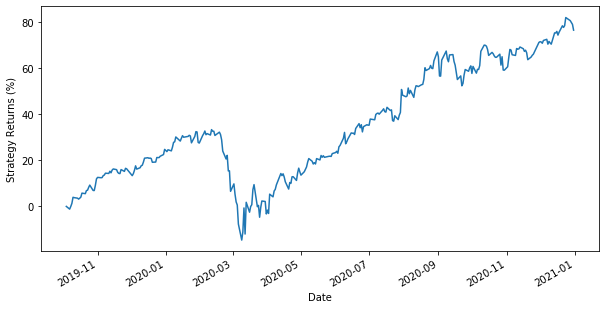

In [8]:
Df['Predicted_Signal'] = cls.predict(X)
# Calculate log returns
Df['Return'] = np.log(Df.Close.shift(-1) / Df.Close)*100
Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal
Df.Strategy_Return.iloc[split:].cumsum().plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.show()

As seen from the graph, the strategy generates a return of 75%+ for the test data set.